# Data 4 Business 2025 | Quantum Computing Workshop Demo mit Qiskit 
<img src="images/EnBW_Logo_Standard_BlauOrange.png" alt="EnBW Logo" width="220" />

Willkommen! Dieses Notebook führt dich interaktiv durch grundlegende Quantum-Computing-Konzepte:

- Bloch-Sphäre & Einzel-Qubit-Rotationen
- Messwahrscheinlichkeiten verstehen und beeinflussen
- Kontrollierte Gates (CNOT) als Basis für Logik & Vorstufe zu Verschränkung
- Mini Half-Adder (1-Bit Addition) mit Qubits

Starte so:
1. Führe die Import-Zelle aus.
2. Nutze die interaktive Bloch-Sphäre (Kapitel 0).
3. Arbeite die Aufgaben der Reihe nach durch.

Ziel: Intuition für Zustände, Superposition und erste logische Strukturen gewinnen. 🚀


# Überblick: Wichtige Quantum Gates (Qiskit Basis)

Unten findest du eine kompakte Übersicht der wichtigsten elementaren Quanten-Gatter, die wir gleich verwenden oder erweitern können. Ein Qubit-Zustand lässt sich als |ψ⟩ = α|0⟩ + β|1⟩ schreiben (mit |α|²+|β|²=1). Gatter wirken linear (Unitary) auf diesen Vektor.

| Gate | Qiskit Befehl | Matrix / Wirkung (kurz) | Intuition |
|------|---------------|-------------------------|-----------|
| Identity (I) | `qc.id(q)` | [[1,0],[0,1]] | Tut nichts – Platzhalter / Timing |
| Pauli-X | `qc.x(q)` | [[0,1],[1,0]] | Bit-Flip: |0⟩ ↔ |1⟩ (klassisches NOT) |
| Pauli-Y | `qc.y(q)` | [[0,-i],[i,0]] | Kombination aus Flip + Phase (Rotation um Y-Achse) |
| Pauli-Z | `qc.z(q)` | [[1,0],[0,-1]] | Phasenflip: |1⟩ erhält ein − Zeichen |
| Hadamard (H) | `qc.h(q)` | (1/√2)[[1,1],[1,-1]] | Erzeugt Superposition: |0⟩→(|0⟩+|1⟩)/√2 |
| Phase (S) | `qc.s(q)` | diag(1, i) | Vierteldrehung um Z (π/2), fügt Phase zu |1⟩ hinzu |
| S† (Sdg) | `qc.sdg(q)` | diag(1, -i) | Inverse von S |
| T | `qc.t(q)` | diag(1, e^{iπ/4}) | Achteldrehung um Z (π/4) |
| T† (Tdg) | `qc.tdg(q)` | diag(1, e^{-iπ/4}) | Inverse von T |
| RX(θ) | `qc.rx(theta, q)` | Rotation um X | Feine kontrollierte Drehung |
| RY(θ) | `qc.ry(theta, q)` | Rotation um Y | Erzeugt kontrollierte Superposition |
| RZ(θ) | `qc.rz(theta, q)` | Rotation um Z | Ändert relative Phase |
| U(θ,φ,λ) | `qc.u(theta,phi,lmbd,q)` | Allgemeines 1-Qubit-Gate | Bel. Rotation (Euler-Zersetzung) |
| CX / CNOT | `qc.cx(c,t)` | Flipt Ziel falls Kontrolle=1 | Erzeugt Verschränkung |
| CZ | `qc.cz(c,t)` | Fügt Phase − zu |11⟩ hinzu | Phasenverschränkung |
| SWAP | `qc.swap(q1,q2)` | Vertauscht Zustände | Datenumlagerung |
| CCX (Toffoli) | `qc.ccx(c1,c2,t)` | Flipt Ziel falls beide Kontrollen=1 | Universell für klassische Logik |
| Barrier | `qc.barrier()` | — | Verhindert Compiler-Neuordnung |
| Measure | `qc.measure(q,c)` | Kollabiert Zustand → Bit | Liest Ergebnis (nicht unitär) |

Weitere nützliche:
- `qc.reset(q)` setzt ein Qubit zurück auf |0⟩ (nicht unitär, für Mid-Circuit Measurements nützlich)
- `qc.measure_all()` misst alle Qubits bequem.

Warum Superposition & Verschränkung? 
- Superposition (z.B. durch H) verteilt Amplituden über Basiszustände. 
- Verschränkung (z.B. H + CX) erzeugt Korrelationen, die klassisch nicht erklärt werden können.


> Tipp: Wenn du unsicher bist welches Gate du brauchst, schau zuerst hier rein oder nutze `qc.draw('mpl')` um den aktuellen Zustand der Schaltung zu visualisieren.


# Binder-Umgebung
Dieses Notebook läuft auf Binder. Eine lokale virtuelle Umgebung ist nicht erforderlich.

# Qiskit Workshop Demo 
Willkommen zur Qiskit Live-Demo! Imports für alle tests. 

**Wichtig!** Zu erst diese Zelle ausführen.

In [1]:
# Abhängigkeiten sind bereits über requirements.txt installiert
# Falls du lokal ohne Installation arbeitest, entferne das Kommentarzeichen vor der nächsten Zeile:
# %pip install qiskit qiskit-aer matplotlib pylatexenc
import qiskit
import qiskit_aer
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram  # Für Histogramme weiter unten
import math  # Für Winkel / π etc.

# Gemeinsamer Simulator (kann in späteren Zellen direkt genutzt werden)
backend = Aer.get_backend('qasm_simulator')

print("Qiskit importiert (Basis-Imports + Simulator bereit)")

Qiskit importiert (Basis-Imports + Simulator bereit)


# Interaktive Blochsphere Demo


In [2]:
from interactive_plots import interactive_bloch_2


display(interactive_bloch_2)

interactive(children=(ToggleButtons(description='Gate:', options=('I', 'X', 'Y', 'Z', 'H'), value='I'), Output…

# Kapitel 0: Interaktive Bloch-Sphäre – Qubit Zustand entdecken
In diesem Einstiegs-Kapitel kannst du mit einem einzelnen Qubit spielen und sehen, wie sich Rotationen auf der Bloch-Sphäre auswirken.

**Ziel:**
- Verstehen: Ein Qubit-Zustand entspricht einem Punkt auf der Oberfläche der Bloch-Kugel.
- Rotationen um X / Y / Z verschieben diesen Punkt.
- Messwahrscheinlichkeit für 0/1 hängt von der Projektion auf die Z-Achse ab.


## Aufgabe: Qubit gezielt manipulieren – Bloch-Sphäre

Nutze die interaktive Bloch-Sphäre in der nächsten Zelle, um das Qubit gezielt so zu drehen, dass du beim Messen möglichst sicher eine 0 oder eine 1 erhältst.

**Deine Aufgabe:**
1. Stelle die Regler so ein, dass die Messwahrscheinlichkeit für **0** möglichst nahe bei 100% liegt.

2. Stelle die Regler so ein, dass die Messwahrscheinlichkeit für **1** möglichst nahe bei 100% liegt. 

3. Probiere auch Zwischenwerte aus (z.B. 50%/50%) und beobachte, wie sich die Histogramme und die Position auf der Bloch-Sphäre verändern.

> Tipp: Die X-Drehung (Rx) bringt das Qubit von Nordpol (|0⟩) zum Südpol (|1⟩). Die Y-Drehung (Ry) mischt die Wahrscheinlichkeiten. Die Z-Phase beeinflusst die Messung erst nach Basiswechsel.

**Bonus:**
- Kannst du mit einer Kombination der Regler einen Zustand erzeugen, der bei Messung immer 1 ergibt, aber eine andere Phase hat als der Standard-|1⟩-Zustand?


In [3]:
# Interaktive Bloch-Sphäre (optimiert)
# Jetzt mit Eingabe in Grad (°) für Rx, Ry, Rz – intern automatische Umrechnung in Radiant

from ipywidgets import FloatSlider, IntSlider, ToggleButtons, Button, HBox, VBox, Output
from qiskit.visualization import plot_bloch_vector, plot_histogram
import numpy as np, math

# Simulatoren (nur falls Modus = 'Simulator')
backend_state = Aer.get_backend('statevector_simulator')
backend_qasm = backend  # bereits vorhandener qasm_simulator

# --- Analytische Bloch-Vektor Berechnung für |0> --Rx--> --Ry--> --Rz-->
# Startzustand |0>: Bloch (0,0,1)

def bloch_after_rotations(rx_rad, ry_rad, rz_rad):  # erwartet Radiant
    x, y, z = 0.0, 0.0, 1.0
    if abs(rx_rad) > 1e-12:
        y, z = y*math.cos(rx_rad) - z*math.sin(rx_rad), y*math.sin(rx_rad) + z*math.cos(rx_rad)
    if abs(ry_rad) > 1e-12:
        x, z = x*math.cos(ry_rad) + z*math.sin(ry_rad), -x*math.sin(ry_rad) + z*math.cos(ry_rad)
    if abs(rz_rad) > 1e-12:
        x, y = x*math.cos(rz_rad) - y*math.sin(rz_rad), x*math.sin(rz_rad) + y*math.cos(rz_rad)
    return [x, y, z]

# Widgets (jetzt in Grad – verständlicher für Einsteiger)
# Bereich 0° .. 360° (volle Umdrehung). Schritt 1° für feine Kontrolle.
slider_rx = FloatSlider(min=0, max=360, step=1, value=0, description='X (°)')  # kippt zwischen |0> und |1>
slider_ry = FloatSlider(min=0, max=360, step=1, value=0, description='Y (°)')  # mischt Wahrsch.
slider_rz = FloatSlider(min=0, max=360, step=1, value=0, description='Z (°)')  # ändert Phase
slider_shots = IntSlider(min=50, max=2000, step=50, value=500, description='Messungen')
mode = ToggleButtons(options=['Schnell','Simulator'], description='Modus')
btn_update = Button(description='Aktualisieren', button_style='primary', tooltip='Manuell neu rendern')
output = Output()

help_text = Output()
with help_text:
    print("Erklärung der Regler (Grad):")
    print("- X (°): Rotation um X-Achse. Bewegt Zustand vom Nordpol zum Südpol (ändert Mess-Wahrsch.).")
    print("- Y (°): Rotation um Y-Achse. Ebenfalls Änderung der 0/1-Wahrscheinlichkeiten.")
    print("- Z (°): Rotation um Z-Achse. Ändert NUR die Phase (sichtbar nach Basiswechsel, z.B. via H).")
    print("- Messungen: Anzahl der Wiederholungen zur statistischen Approximation.")
    print("- Modus 'Schnell': Formeln ohne echten Simulator. 'Simulator': echter Statevector + Messung.")
    print("Hinweis: 180° ≙ π Radiant, 360° ≙ 2π Radiant.")

rendering = False

def _plot_percent_hist(prob_dict, title):
    """Hilfsfunktion: plot_histogram auf 0..1 skalieren + Prozent-Achse."""
    from matplotlib.ticker import PercentFormatter
    fig_or_ax = plot_histogram(prob_dict, title=title)
    # plot_histogram kann Figure oder Axes-like zurückgeben
    if hasattr(fig_or_ax, 'axes'):
        ax = fig_or_ax.axes[0]
    else:
        ax = fig_or_ax
    ax.set_ylim(0,1.0)
    ax.set_ylabel('Prozent')
    ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
    try:
        from IPython.display import display as _display
        if hasattr(fig_or_ax, 'axes'):
            _display(fig_or_ax)
        else:
            _display(ax.figure)
    except Exception:
        pass

def render():
    global rendering
    if rendering:  # einfache Reentrancy-Guard
        return
    rendering = True
    with output:
        output.clear_output(wait=True)
        # Werte in Grad einlesen
        rx_deg, ry_deg, rz_deg, shots = slider_rx.value, slider_ry.value, slider_rz.value, slider_shots.value
        # Umrechnung in Radiant für Berechnung / Qiskit Gates
        rx = math.radians(rx_deg)
        ry = math.radians(ry_deg)
        rz = math.radians(rz_deg)
        if mode.value == 'Schnell':
            bloch = bloch_after_rotations(rx, ry, rz)
            z = bloch[2]
            p0 = (1+z)/2
            p1 = 1-p0
            # Wahrscheinlichkeiten direkt (nicht erst Counts → dann normalisieren)
            probs = {'0': p0, '1': p1}
            print(f"Analytisch | Rx={rx_deg:.0f}° Ry={ry_deg:.0f}° Rz={rz_deg:.0f}° -> p(0)≈{p0:.3f} p(1)≈{p1:.3f}")
            qc = QuantumCircuit(1,1)
            if rx: qc.rx(rx,0)
            if ry: qc.ry(ry,0)
            if rz: qc.rz(rz,0)
            try:
                display(qc.draw('mpl'))
            except Exception:
                print(qc.draw())
            display(plot_bloch_vector(bloch, title='Bloch-Sphäre (analytisch)'))
            _plot_percent_hist(probs, title='Messung (approximiert, %)')
        else:
            qc = QuantumCircuit(1,1)
            if rx: qc.rx(rx,0)
            if ry: qc.ry(ry,0)
            if rz: qc.rz(rz,0)
            sv = backend_state.run(qc).result().get_statevector(qc)
            a, b = sv[0], sv[1]
            x = 2 * np.real(np.conjugate(a) * b)
            y = 2 * np.imag(np.conjugate(a) * b)
            z = np.abs(a)**2 - np.abs(b)**2
            bloch = [x,y,z]
            qc_m = qc.copy(); qc_m.measure(0,0)
            counts = backend_qasm.run(qc_m, shots=shots).result().get_counts(qc_m)
            # In Wahrscheinlichkeiten normalisieren
            total = sum(counts.values()) or 1
            probs = {k: v/total for k,v in counts.items()}
            print(f"Simulator | Rx={rx_deg:.0f}° Ry={ry_deg:.0f}° Rz={rz_deg:.0f}° -> Prozent: " + 
                  ", ".join(f"{b}={(p*100):.1f}%" for b,p in sorted(probs.items())))
            try:
                display(qc.draw('mpl'))
            except Exception:
                print(qc.draw())
            display(plot_bloch_vector(bloch, title='Bloch-Sphäre (Simulator)'))
            _plot_percent_hist(probs, title='Messung (Simulator, %)')
    rendering = False

# Auto-Update bei Slider-Änderungen
for w in (slider_rx, slider_ry, slider_rz, slider_shots, mode):
    w.observe(lambda change: render() if change['name']=='value' else None, names='value')
btn_update.on_click(lambda _: render())

controls = VBox([
    help_text,
    HBox([slider_rx, slider_ry, slider_rz]),
    HBox([slider_shots, mode, btn_update])
])

display(controls)
display(output)  # wichtig: Output anzeigen
render()  # erste Ausgabe

Output()

## Kapitel 1: Einfacher Einzel-Qubit-Circuit – Wie oft messen wir 0 oder 1?
Wir erstellen einen Circuit mit 1 Qubit und 1 klassischem Bit. Ein Hadamard-Gatter `H` bringt das Qubit in eine Superposition, sodass bei vielen Messungen ungefähr gleich oft `0` und `1` auftreten. Wir simulieren direkt und schauen uns die Häufigkeiten an.

**Aufgabe:** Füge das Hadamard-Gatter ein und sieh dir den output an. 

Wenn du das Gatter eingefügt hasst makiere die Zelle und drücke auf das Play/Start Symbol oben in der Leiste um die Zelle wie auch bisher auszführen.

> Die Schaltung wird für jedes Circuit dargestellt je nachdem welche Gatter du einfügst. So kannst du mit der Schaltungslösung genau sehen ob du es richtig gemacht hasst. Der restliche code dient hauptsächlich zur Darstellung und Legenden des Outputs und muss nicht geändert werden.

Schaltungslösung:

![Kapitel 1 Schaltung](images/kapitel1_schaltung.png)

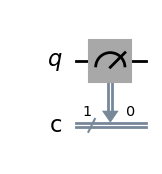

Häufigkeiten (Anzahl der Messungen pro Ergebnis): {'0': 100}
Prozent: 0 = 100.0%


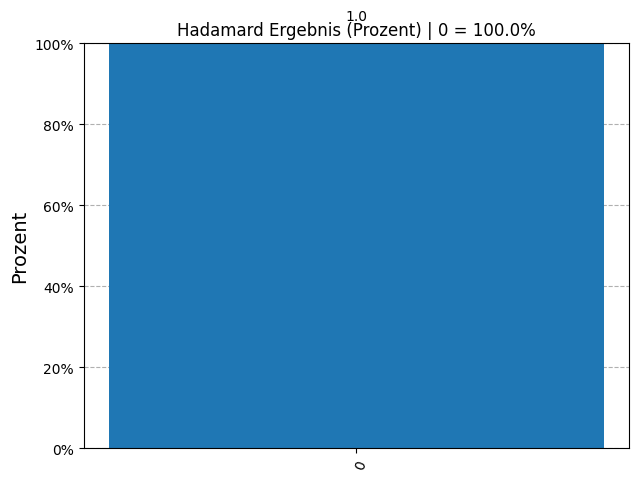

In [ ]:
# Einfaches Beispiel: 1 Qubit, Hadamard, Messung
# Ziel: Zeigen, dass ein einzelnes Qubit nach einem Hadamard ungefähr zu 50% als 0 und 50% als 1 gemessen wird.

# Anzahl der wiederholungen von dem Circuit.
shots = 100

#qc_simple ist nur der Name des Circuits und ändert sich je nach Zelle um Konflikte zu vermeiden.
# Erzeuge einen Circuit mit 1 Qubit und 1 klassischem Bit. Klassisches Bit wird benutzt um das Ergebnis zu speichern
qc_simple = QuantumCircuit(1,1) # Qubit,Bit

# Hadamard-Gatter auf Qubit 0: |0> -> (|0> + |1>)/√2 (Superposition)
#Unter diesem Kommentar fügst du das Hadamard-Gatte ein. Ist das Qubit in 1 oder 0 position?



# Messe Qubit 0 in das klassische Bit 0 (kollabiert Superposition zu 0 oder 1)
qc_simple.measure(0,0)

# Zeichne die Schaltung (mit 'mpl')
try:
    display(qc_simple.draw('mpl'))
except Exception:
    print(qc_simple.draw())

# Simuliere die Schaltung: 'qasm_simulator' führt viele Messwiederholungen (shots) aus
result = backend.run(qc_simple, shots=shots).result()  # 100 Wiederholungen -> statistische Verteilung

# Hole die Zählungen der gemessenen Bitstrings (hier nur '0' oder '1')
counts_simple = result.get_counts(qc_simple)
print("Häufigkeiten (Anzahl der Messungen pro Ergebnis):", counts_simple)

# In Wahrscheinlichkeiten / Prozent umrechnen
probs_simple = {k: v/shots for k,v in counts_simple.items()}
percent_line = " , ".join(f"{bit} = {p*100:.1f}%" for bit, p in sorted(probs_simple.items(), reverse=True))
print("Prozent:", percent_line)

from matplotlib.ticker import PercentFormatter
fig_or_ax = plot_histogram(probs_simple, title=f"Hadamard Ergebnis (Prozent) | {percent_line}")

# Achse auf Prozent formatieren
if hasattr(fig_or_ax, 'axes'):
    ax = fig_or_ax.axes[0]
else:
    ax = fig_or_ax
ax.set_ylim(0,1.0)
ax.set_ylabel('Prozent')
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))

# Anzeigen
try:
    from IPython.display import display as _display
    if hasattr(fig_or_ax, 'axes'):
        _display(fig_or_ax)
    else:
        _display(ax.figure)
except Exception:
    pass

## Kapitel 2: Wie erzwinge oder beeinflusse ich Messergebnisse?
Wir schauen uns 2 kleine Varianten an (alles noch 1 Qubit):

1. Immer 1 messen: Zustandsvorbereitung durch ein X-Gatter (NOT) vor der Messung.
2. Wahrscheinlichkeiten steuern: Rotation `ry(θ)` – verändert Anteil für 0/1 kontinuierlich.


> Merke: Nur Amplitudenbeträge (|α|², |β|²) bestimmen Messwahrscheinlichkeiten in der Computational Basis. Reine Phase (global oder passend lokal) kann unsichtbar bleiben, bis wir in eine andere Basis rotieren.

### Variante 1: Immer 1 erzwingen mit X-Gate
Wir setzen das Qubit per X-Gatter direkt in den Zustand |1>, damit die Messung (fast) immer 1 liefert.

Schaltungslösung:

![Kapitel 2 Schaltung](images/kpaitel2_schaltung.png)

**Aufgabe:** Füge das (NOT) X-Gatter ein und trage in das Quantum Circuit ein Qubit und ein Klassiches Bit ein um das Circuit zu initialisieren.


Wenn du das Gatter eingefügt hasst und das Circuit initialisiert wurde makiere die Zelle und drücke aus das Play/Start Symbol oben in der Leiste um die Zelle wie auch bisher auszführen.

> Die Schaltung wird für jedes Circuit dargestellt je nachdem welche Gatter du einfügst. So kannst du mit der Schaltungslösung genau sehen ob du es richtig gemacht hasst. Der restliche code dient hauptsächlich zur Darstellung und Legenden des Outputs und muss nicht geändert werden.

In [ ]:
# Variante 1: Immer 1 messen (X)
# Ziel: Zeigen, wie wir das Ergebnis fest auf 1 setzen.

shots = 1000  # Anzahl Wiederholungen

#qc_one ist nur der Name des Circuits und ändert sich je nach Zelle um Konflikte zu vermeiden.

qc_one = QuantumCircuit(,) # Qubit,Bit Bitte hier eintragen.

#Unter diesem Kommentar kannst du das X-Gatter einfügen welches aus |0> das |1> macht.
          

qc_one.measure(0,0)  # Messergebnis ins klassische Bit

# Zeichne die Schaltung (mit 'mpl')
try:
    display(qc_one.draw('mpl'))
except Exception:
    print(qc_one.draw())

counts_one = backend.run(qc_one, shots=shots).result().get_counts(qc_one)
print("Variante 1 - Immer 1 (Counts):", counts_one)

# In Prozent/Wahrscheinlichkeiten umrechnen
probs_one = {k: v/shots for k,v in counts_one.items()}
# Prozent-String (sortiere nach Key absteigend, damit '1' zuerst erscheint)
percent_line = " , ".join(f"{bit} = {p*100:.1f}%" for bit, p in sorted(probs_one.items(), reverse=True))
print("Prozent:", percent_line)

from matplotlib.ticker import PercentFormatter
fig_or_ax = plot_histogram(probs_one, title=f"Variante 1: X -> immer 1 | {percent_line}")

# Falls eine Figure zurückkommt, Achse extrahieren
if hasattr(fig_or_ax, 'axes'):
    ax = fig_or_ax.axes[0]
else:
    ax = fig_or_ax
ax.set_ylim(0, 1.0)
ax.set_ylabel('Prozent')
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))

# Explizit anzeigen (Figure wurde einer Variable zugewiesen)
try:
    from IPython.display import display as _display
    if hasattr(fig_or_ax, 'axes'):
        _display(fig_or_ax)
    else:
        _display(ax.figure)
except Exception:
    pass

# (Optional) Altes Counts-Histogramm:
# plot_histogram(counts_one, title='Variante 1: X -> immer 1 (Counts)')

### Variante 2: Wahrscheinlichkeiten fein einstellen mit RY(θ)
Mit einer Rotation um die Y-Achse stellen wir kontinuierlich ein, wie oft 0 oder 1 fällt.


Schaltungslösung:

![Kapitel 2 Schaltung (Version 2)](images/kapitel2_schaltungv2.png)

**Aufgabe:** Füge das RY-Gatter ein und trage in das Quantum Circuit ein Qubit und ein Klassiches Bit ein um das Circuit zu initialisieren. 

- Theta (θ) in diesem Beispiel beeinflussed den Pfeil aus der Blochsphere je nach dem welcher Winkel eingestellt wird. 



**BONUS:** Versuche den Winkel Theta (θ) so zu ändern das wir entweder 0 oder 1 als Ergebniss bekommen.



- Wenn du das Gatter eingefügt hasst und das Circuit initialisiert wurde makiere die Zelle und drücke aus das Play/Start Symbol oben in der Leiste um die Zelle wie auch bisher auszführen.

>Die Schaltung wird für jedes Circuit dargestellt je nachdem welche Gatter du einfügst. So kannst du mit der Schaltungslösung genau sehen ob du es richtig gemacht hasst. Der restliche code dient hauptsächlich zur Darstellung und Legenden des Outputs und muss nicht geändert werden.
- Wenn du hilfe brauchst um das richtige gatter mit den jeweiligen parametern zu finden scrolle hoch und schau dir die Gatter Tabelle an für RY

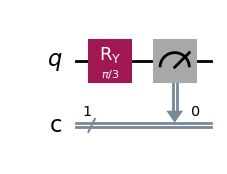

Variante 2 - RY(1.05): {'0': 358, '1': 142}
Prozent: 1 = 28.4% , 0 = 71.6%


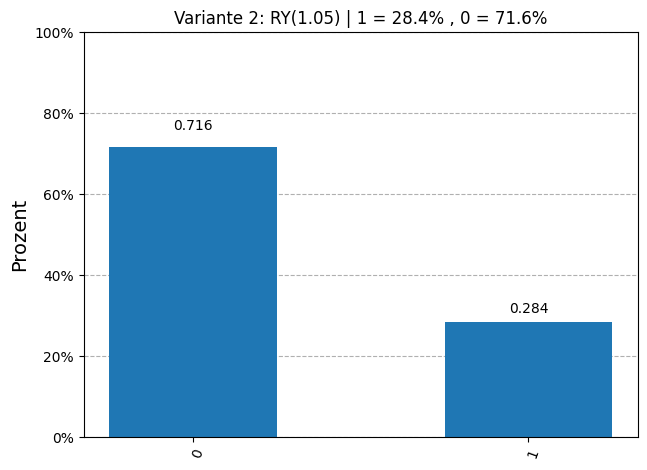

In [ ]:
# Variante 2: Wahrscheinlichkeiten steuern mit RY(θ)
# Ziel: θ bestimmt wie oft 1 herauskommt (glatte Einstellmöglichkeit)

shots = 500
θ = 60 * math.pi / 180    # 60 Grad direkt als Winkel, Umrechnung in Radiant

#qc_bias ist nur der Name des Circuits und ändert sich je nach Zelle um Konflikte zu vermeiden.

qc_bias =  # QuantumCircuit wird hier initialisiert, Qubit,Bit Bitte hier eintragen.

#Unter diesem Kommentar kannst du das RY-Gatter einfügen welches aus |0> eine Mischung aus |0> und |1> macht.



qc_bias.measure(0,0) #Messung 

# Zeichne die Schaltung (mit 'mpl')
try:
    display(qc_bias.draw('mpl'))
except Exception:
    print(qc_bias.draw())

counts_bias = backend.run(qc_bias, shots=shots).result().get_counts(qc_bias)
print(f"Variante 2 - RY({θ:.2f}):", counts_bias)

# In Prozent / Wahrscheinlichkeiten
probs_bias = {k: v/shots for k,v in counts_bias.items()}
percent_line = " , ".join(f"{bit} = {p*100:.1f}%" for bit, p in sorted(probs_bias.items(), reverse=True))
print("Prozent:", percent_line)

from matplotlib.ticker import PercentFormatter
fig_or_ax = plot_histogram(probs_bias, title=f"Variante 2: RY({θ:.2f}) | {percent_line}")

# Figure/Axes handhaben wie zuvor
if hasattr(fig_or_ax, 'axes'):
    ax = fig_or_ax.axes[0]
else:
    ax = fig_or_ax
ax.set_ylim(0,1.0)
ax.set_ylabel('Prozent')
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))

try:
    from IPython.display import display as _display
    if hasattr(fig_or_ax, 'axes'):
        _display(fig_or_ax)
    else:
        _display(ax.figure)
except Exception:
    pass

## Kapitel 3: CNOT (CX) einfach erklärt 2 QUBITS
Das CNOT (CX) hat zwei Qubits:
- Oben: Kontrolle ("Control").
- Unten: Ziel ("Target").

**Regel:** Ist die Kontrolle = 1, dann mache ein X (Flip) auf dem Ziel. Ist die Kontrolle = 0, tue nichts.

Man kann es wie einen "bedingten Lichtschalter" sehen: Control = 1 schaltet den Zustand des Ziel-Qubits um.



>**Aufgabe:** Fülle die ?? aus um die Wahrheitstablle zu vervollständigen. Wenn nicht lass die untere Zelle laufen und schaue dir die Ergebnisse an die wir in den 4 Varianten bekommen.

### Wahrheitstabelle
| Control | Target (vorher) | Target (nachher) | Ausgabe (Control Target) | Was passiert? |
|---------|-----------------|------------------|---------------------------|---------------|
| 0       | 0               | 0                | ??                        | Nichts        |
| 0       | 1               | ?                | ??                        | Nichts        |
| 1       | 0               | ?                | ??                        | Flip          |
| 1       | 1               | 0                | ??                        | Flip          |

Kurz: Nur in den unteren beiden Zeilen (Control=1) wechselt das Ziel.

### Warum ist das wichtig?
- So bauen wir Verschränkung: z.B. erst Hadamard auf das Control (Superposition), dann CX → erzeugt Bell-Zustände.
- So können wir Logik (IF) in Quanten-Schaltungen nachbilden.

Gleich unten erstellen wir jede der vier Kombinationen und prüfen, was rauskommt.



Circuit für Eingang 00:


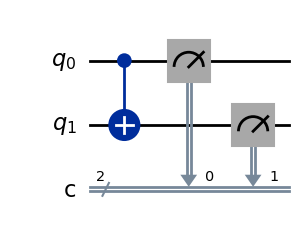

Eingang 00 -> Ausgabe Counts: {'00': 256}

Circuit für Eingang 01:


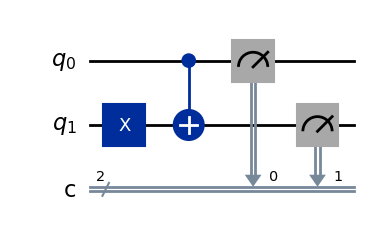

Eingang 01 -> Ausgabe Counts: {'10': 256}

Circuit für Eingang 10:


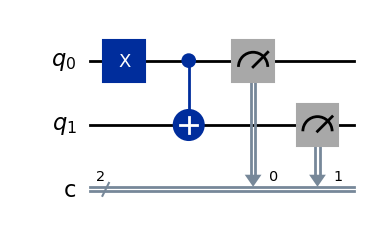

Eingang 10 -> Ausgabe Counts: {'11': 256}

Circuit für Eingang 11:


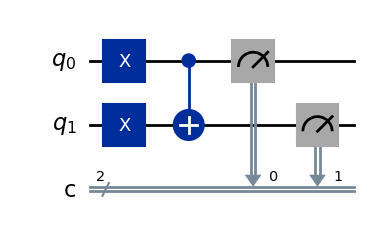

Eingang 11 -> Ausgabe Counts: {'01': 256}

Zusammenfassung (dominierender Output):
00 -> 00
01 -> 10
10 -> 11
11 -> 01


In [7]:
# CNOT Wahrheitstabelle per Simulation
# Wir erzeugen die vier Basiszustände |00>, |01>, |10>, |11>, wenden CX an und messen.


shots = 256
kombinationen = {
    "00": [],
    "01": [(1, 'x')],        # Ziel (unten) auf 1 setzen
    "10": [(0, 'x')],        # Control (oben) auf 1 setzen
    "11": [(0, 'x'), (1, 'x')]  # Beide auf 1 setzen
}

results = {}

for name, ops in kombinationen.items():
    qc = QuantumCircuit(2,2)
    # Vorbereitung
    for qubit, art in ops:
        if art == 'x':
            qc.x(qubit)
    # CX: Kontrolle = Qubit 0, Ziel = Qubit 1
    qc.cx(0,1)
    qc.measure([0,1],[0,1])

    # Circuit zeichnen (so sieht das Gatter in dieser Eingabe aus)
    print(f"\nCircuit für Eingang {name}:")
    try:
        display(qc.draw('mpl'))
    except Exception:
        print(qc.draw())

    counts = backend.run(qc, shots=shots).result().get_counts(qc)
    results[name] = counts
    print(f"Eingang {name} -> Ausgabe Counts: {counts}")

# Zusammenfassung in einer kleinen Tabelle drucken
print("\nZusammenfassung (dominierender Output):")
for eingang, counts in results.items():
    # größten Key finden
    dominant = max(counts.items(), key=lambda kv: kv[1])[0]
    print(f"{eingang} -> {dominant}")

## Mini Quanten-"Taschenrechner": 1-Bit + 1-Bit
# Fortgeschritten erstelle das Quantum Circuit

Wir bauen eine ganz einfache Addition: zwei klassische Bits (0 oder 1) werden addiert. Ergebnis besteht aus:
- SUM (Ergebnisstelle)
- CARRY (Übertrag, nur 1 falls 1+1 passiert)

Klassische Wahrheitstabelle:
```
a b | SUM CARRY
0 0 |  0    0
0 1 |  1    0
1 0 |  1    0
1 1 |  0    1   (weil 1+1 = 2 = (10)_2)
```

### Idee mit Qubits
Wir verwenden 3 Qubits:
- q0 = a (Eingabe)
- q1 = b (Eingabe / wird später zur SUM)
- q2 = 0 (Start bei |0>, speichert CARRY)

Schritte:
1. Falls a=1 oder b=1: setze q0 oder q1 mit `x`.
2. `ccx(q0,q1,q2)` (Toffoli) schreibt a AND b in q2 → das ist unser CARRY.
3. `cx(q0,q1)` macht aus q1 jetzt a XOR b → das ist unsere SUM.
4. Messen: q1 = SUM, q2 = CARRY.

Fertig – das ist schon ein 1-Bit-Addierer.

### Merken
- CNOT = XOR (wenn du ein Ziel-Bit toggeln willst, falls Control=1).
- Toffoli = UND (speichert nur 1 wenn beide Controls 1 waren).


### Interaktive Version: 1-Bit-Addierer mit Buttons
Spiele mit den Eingaben und sieh dir sofort Circuit + Mess-Ergebnis an.

Bedienelemente:
- a, b: Wähle 0 oder 1.
- Shots: Anzahl der Wiederholungen (mehr = stabileres Histogramm).
- Addieren: Baut den Quantum Circuit (Toffoli + CNOT), misst und zeigt SUM & CARRY.
- Reset: Löscht die Ausgabe.

Probiere alle vier Kombinationen (00, 01, 10, 11) und vergleiche mit der Wahrheitstabelle. 💡

In [ ]:
# Interaktiver Half-Adder (Buttons)
from ipywidgets import ToggleButtons, IntSlider, Button, HBox, VBox, Output
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('qasm_simulator')

# Widgets
a_in = ToggleButtons(options=[0,1], description='a:')
b_in = ToggleButtons(options=[0,1], description='b:')
shots_slider = IntSlider(value=256, min=64, max=4096, step=64, description='Shots:')
run_btn = Button(description='Addieren', button_style='success')
reset_btn = Button(description='Reset', button_style='warning')

out = Output()


def build_half_adder(a:int, b:int):
    qc = QuantumCircuit(3,2)
    if a: qc.x(0)
    if b: qc.x(1)
    qc.ccx(0,1,2)  # CARRY
    qc.cx(0,1)     # SUM in q1
    qc.measure(1,0)  # SUM -> c0
    qc.measure(2,1)  # CARRY -> c1
    return qc


def run(_):
    with out:
        out.clear_output(wait=True)
        a = a_in.value; b = b_in.value; shots = shots_slider.value
        qc = build_half_adder(a,b)
        try:
            display(qc.draw('mpl'))
        except Exception:
            print(qc.draw())
        counts = backend.run(qc, shots=shots).result().get_counts(qc)
        # Dominantes Ergebnis extrahieren
        dominant = max(counts.items(), key=lambda kv: kv[1])[0]
        # Bitstring = 'sc' (s=SUM in cbit0 rechts, c=CARRY in cbit1 links)
        sum_bit = dominant[1]
        carry_bit = dominant[0]
        value = int(carry_bit)*2 + int(sum_bit)  # Dezimalwert (0,1,2)
        print(f"Eingabe: a={a} b={b}")
        print(f"Bits: CARRY={carry_bit} SUM={sum_bit}  -> Ergebnis (dezimal) {a} + {b} = {value}")
        print(f"Binär (CARRY SUM) = {carry_bit}{sum_bit}  (entspricht der Zahl {value})")
        # Prozentanzeige vorbereiten
        total = sum(counts.values()) or 1
        probs = {k: v/total for k,v in counts.items()}
        perc = {k: f"{(v*100):5.1f}%" for k,v in probs.items()}
        print("Wahrscheinlichkeiten (%):", {k: perc[k] for k in sorted(probs.keys(), reverse=True)})
        from matplotlib.ticker import PercentFormatter
        fig_or_ax = plot_histogram(probs, title=f'Half-Adder a={a}+b={b} -> {value} (Prozent)')
        # Prozent-Achse formatieren
        if hasattr(fig_or_ax, 'axes'):
            ax = fig_or_ax.axes[0]
        else:
            ax = fig_or_ax
        ax.set_ylim(0,1.0)
        ax.set_ylabel('Prozent')
        ax.yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
        try:
            from IPython.display import display as _display
            if hasattr(fig_or_ax, 'axes'):
                _display(fig_or_ax)
            else:
                _display(ax.figure)
        except Exception:
            pass


def reset(_):
    with out:
        out.clear_output()

run_btn.on_click(run)
reset_btn.on_click(reset)

ui = VBox([
    HBox([a_in, b_in, shots_slider]),
    HBox([run_btn, reset_btn]),
    out
])

display(ui)